In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Librosa 
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import wavio

# Preprocessing audio for data augmentation
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, LowPassFilter, HighPassFilter
import numpy as np

# Image module
from PIL import Image
import PIL

#import torch
#import torchaudio
#import torchaudio.functional as F

#import math

#from IPython.display import Audio
#from torchaudio.utils import download_asset

# Paths
general_path = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/genres_original'
sample_wav = '/pop/pop.00019.wav'


C:\Users\Nacho\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [93]:
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

y, sr = librosa.load(general_path+sample_wav)

augment = Compose([
    #AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    #Shift(min_fraction=-0.5, max_fraction=0.5, p=0.5),
    PitchShift(min_semitones=-7, max_semitones=7, p=0.5),
    LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=7500, min_rolloff=12, max_rolloff=24, zero_phase=False, p=0.5),
    HighPassFilter(min_cutoff_freq=150, max_cutoff_freq=20000, min_rolloff=12, max_rolloff=24, zero_phase=False, p=0.5)
])

# Augment/transform/perturb the audio data
aug_y = augment(samples=y, sample_rate=sr)

wavio.write('C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/Data_augmentation/pop.00019.aug.wav', aug_y, sr, sampwidth=1)

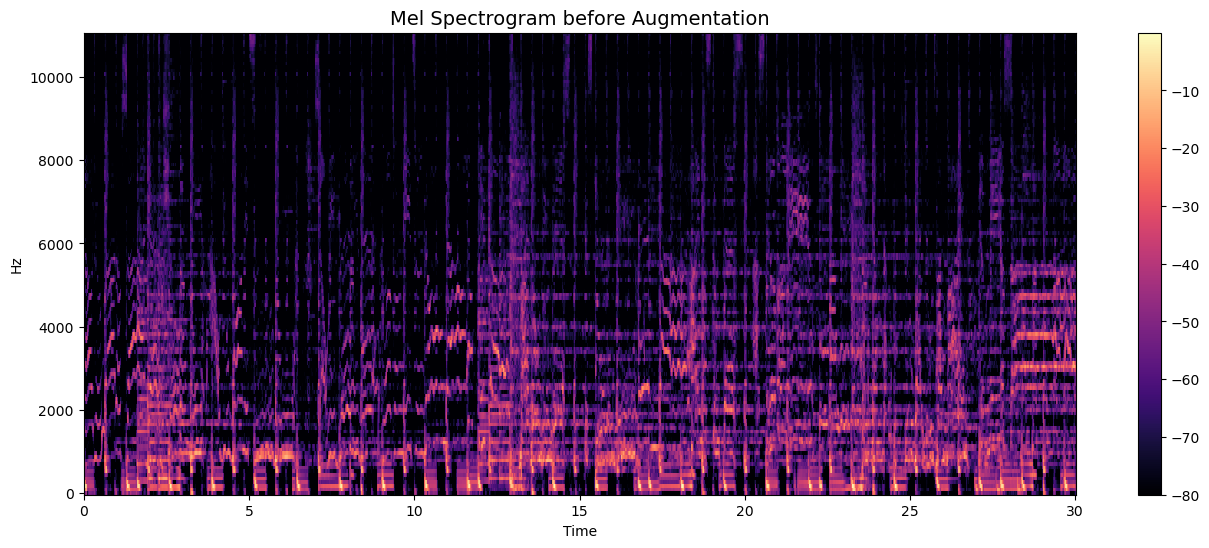

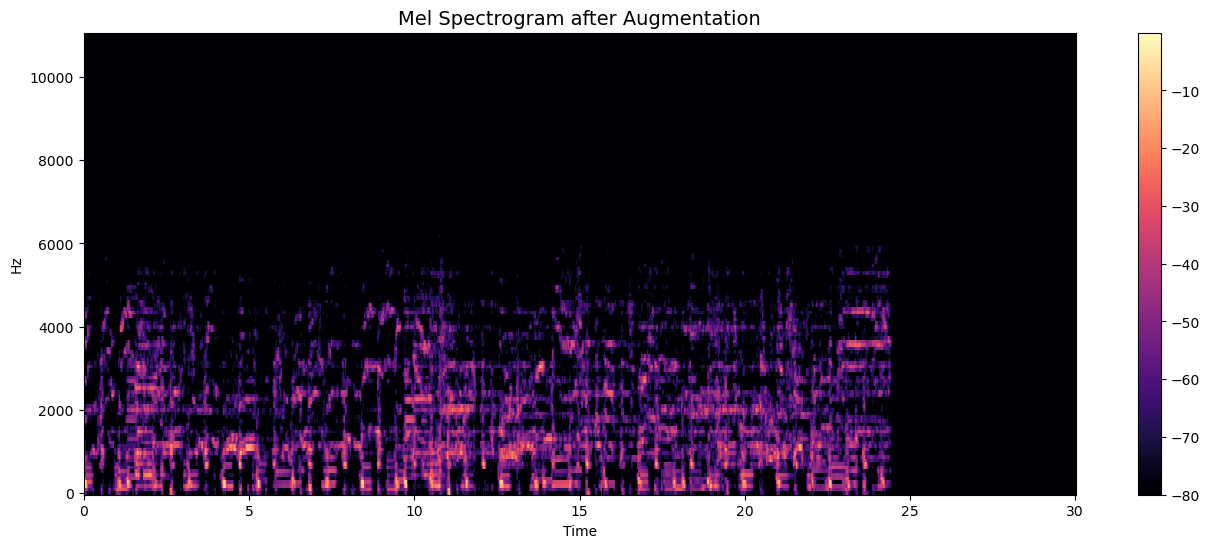

In [94]:
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'magma'); #use magma
plt.colorbar();
plt.title(f"Mel Spectrogram before Augmentation", fontsize = 14);

S = librosa.feature.melspectrogram(y=aug_y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'linear',
                        cmap = 'magma'); #use magma
plt.colorbar();
plt.title(f"Mel Spectrogram after Augmentation", fontsize = 14);

### Functions for generating new Mel Spectrograms

In [5]:
def crop_image(img):
    img_cropped = img[72:534, 200:1440]
    
    return img_cropped

def data_augmentation(wav_file):

    y, sr = librosa.load(wav_file)

    augment = Compose([
        TimeStretch(min_rate=0.8, max_rate=1.25, p=0.99),
        PitchShift(min_semitones=-7, max_semitones=7, p=0.99)
        #LowPassFilter(min_cutoff_freq=150, max_cutoff_freq=7500, min_rolloff=12, max_rolloff=24, zero_phase=False, p=0.5),
        #HighPassFilter(min_cutoff_freq=150, max_cutoff_freq=20000, min_rolloff=12, max_rolloff=24, zero_phase=False, p=0.5)
    ])

    # Augment/transform/perturb the audio data
    aug_y = augment(samples=y, sample_rate=sr)

    return aug_y, sr


def mel_spectrogram(samples, sample_rate, file_path):
    
    hop_length = 512 # number audio of frames between STFT columns (looks like a good default)
    
    #Generate Mel-Spectrogram
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)

    fig = plt.figure(figsize = (16, 6))
    img  = librosa.display.specshow(S_DB, sr=sample_rate, hop_length=hop_length, x_axis = 'time', y_axis = 'linear', cmap = 'magma')
    #plt.colorbar()
    plt.axis("off")
    plt.savefig(file_path)
    plt.close(fig)

def trim_spectrogram():
'''
y, sr = data_augmentation(general_path + sample_wav)
file_path = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/Data_augmentation/mel_spectrogram.jpg'
mel_spectrogram(y, sr, file_path)


import cv2
img = cv2.imread(file_path)
img_cro = crop_image(img)
cv2.imwrite(file_path, img_cro) 
'''

  


"\ny, sr = data_augmentation(general_path + sample_wav)\nfile_path = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/Data_augmentation/mel_spectrogram.jpg'\nmel_spectrogram(y, sr, file_path)\n\n\nimport cv2\nimg = cv2.imread(file_path)\nimg_cro = crop_image(img)\ncv2.imwrite(file_path, img_cro) \n"

In [ ]:
# Paths
main_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/genres_original'
copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_x3'

os.mkdir(copy_directory)

for genre in os.listdir(main_directory):
    genre_directory = main_directory + '/' + genre
    new_genre_directory = copy_directory + '/' + genre
    os.mkdir(new_genre_directory)
    for wav_file in os.listdir(genre_directory):
        for i in range(3):
            file_path = genre_directory + '/' + wav_file
            y, sr = data_augmentation(file_path)
            new_file_path = new_genre_directory+'/'+os.path.splitext(wav_file)[0]+ 'u0' + str(i) + '.jpg'
            mel_spectrogram(y, sr, new_file_path)
        
'''
# Mel-spectrograms directory
for folder in os.listdir(copy_directory):
    sub_directory_main  = copy_directory + '/' + folder
    sub_directory_new = new_directory + '/' + folder
    os.mkdir(sub_directory_new)
    for image in os.listdir(sub_directory_main):
        old_file_path = sub_directory_main + '/' + image
        new_file_path = sub_directory_new + '/' + image
        #print(file_path)
        img_cropped = crop_image(old_file_path)
        #plt.imshow(img_cropped)
        #plt.axis("off")
        plt.imsave(new_file_path, img_cropped)

# Create new directory with images cropped
for folder in os.listdir(copy_directory):
    sub_directory_main  = copy_directory + '/' + folder
    sub_directory_new = new_directory + '/' + folder
    os.mkdir(sub_directory_new)
    for image in os.listdir(sub_directory_main):
        old_file_path = sub_directory_main + '/' + image
        new_file_path = sub_directory_new + '/' + image
        #print(file_path)
        img_cropped = crop_image(old_file_path)
        #plt.imshow(img_cropped)
        #plt.axis("off")
        plt.imsave(new_file_path, img_cropped)
'''


In [ ]:
# Paths
main_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/genres_original'
copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/genres_copy'

os.mkdir(copy_directory)

for genre in os.listdir(main_directory):
    genre_directory = main_directory + '/' + genre
    new_genre_directory = copy_directory + '/' + genre
    os.mkdir(new_genre_directory)
    for wav_file in os.listdir(genre_directory):
        for i in range 
        file_path = genre_directory + '/' + wav_file
        y, sr = data_augmentation(file_path)
        new_file_path = new_genre_directory+'/'+os.path.splitext(wav_file)[0]+'.jpg'
        mel_spectrogram(y, sr, new_file_path)

In [6]:
copy_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_x3'
new_directory = 'C:/Users/Nacho/Documents/TELECO_6/TFG/Datasets/images_augmented_x3_cropped'

os.mkdir(new_directory)

# Create new directory with images cropped
for folder in os.listdir(copy_directory):
    sub_directory_main  = copy_directory + '/' + folder
    sub_directory_new = new_directory + '/' + folder
    os.mkdir(sub_directory_new)
    for image in os.listdir(sub_directory_main):
        old_file_path = sub_directory_main + '/' + image
        new_file_path = sub_directory_new + '/' + image
        #print(file_path)
        img_cropped = crop_image(old_file_path)
        #plt.imshow(img_cropped)
        #plt.axis("off")
        plt.imsave(new_file_path, img_cropped)

TypeError: string indices must be integers

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    main_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 999 files belonging to 10 classes.
Using 800 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    main_directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


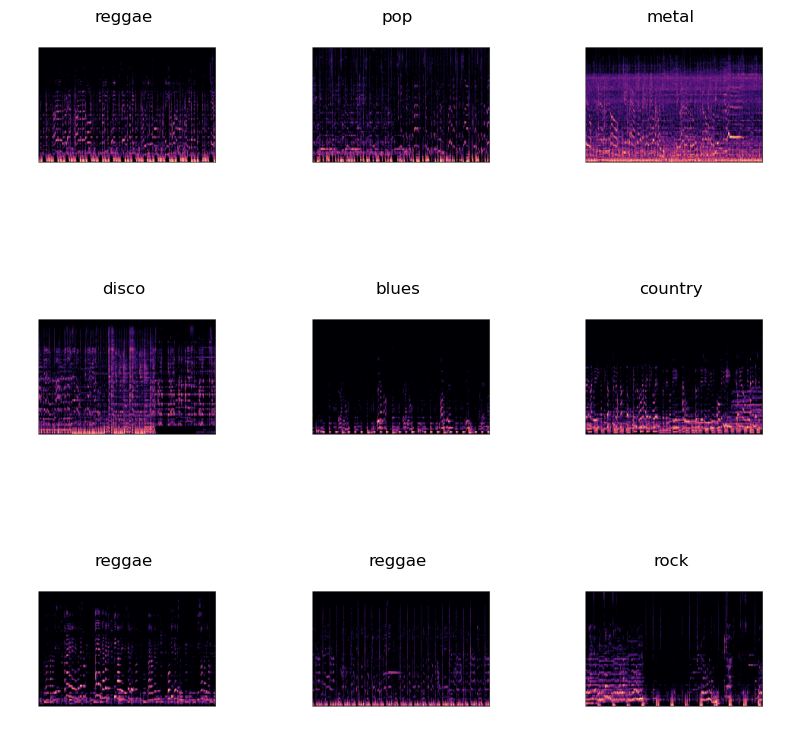

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [7]:
# CNN model 1
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 300, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 200, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 75, 64)        1

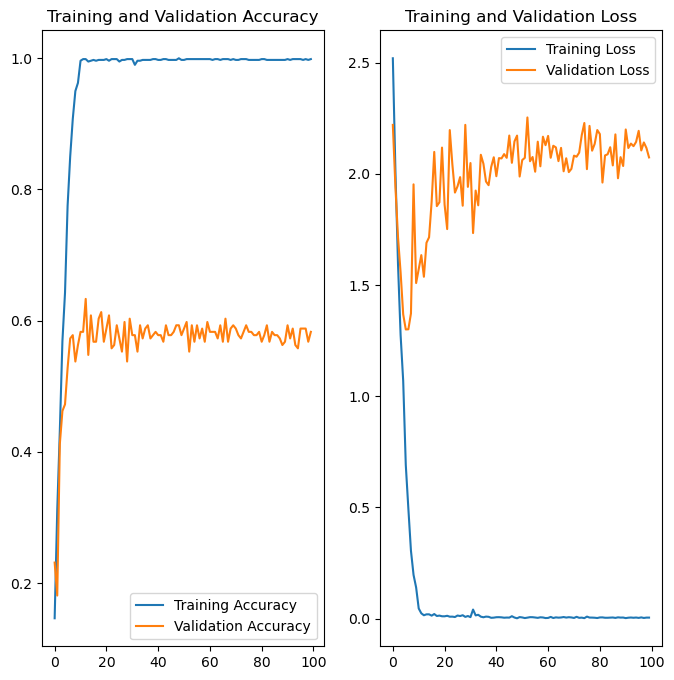

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
# CNN model 2
num_classes = len(class_names)

model = keras.Sequential([
  layers.Input(shape=(img_height, img_width, 3)),
    
  layers.Conv2D(16, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),

  layers.Conv2D(32, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(64, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(128, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  layers.Conv2D(256, 3, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(2, 2),
  layers.Dropout(0.2),
    
  
  layers.Flatten(),
  layers.Dropout(0.5),
    
  layers.Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 300, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 150, 16)     0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 100, 150, 16)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 150, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 50, 75, 32)       

Epoch 37/100
25/25 [==============================] - 39s 2s/step - loss: 1.2214 - accuracy: 0.5663 - val_loss: 1.4610 - val_accuracy: 0.5176
Epoch 38/100
25/25 [==============================] - 39s 2s/step - loss: 1.2768 - accuracy: 0.5437 - val_loss: 1.5203 - val_accuracy: 0.4874
Epoch 39/100
25/25 [==============================] - 39s 2s/step - loss: 1.2786 - accuracy: 0.5337 - val_loss: 1.4147 - val_accuracy: 0.5226
Epoch 40/100
25/25 [==============================] - 39s 2s/step - loss: 1.2019 - accuracy: 0.5575 - val_loss: 1.3596 - val_accuracy: 0.5678
Epoch 41/100
25/25 [==============================] - 39s 2s/step - loss: 1.1323 - accuracy: 0.5888 - val_loss: 1.4127 - val_accuracy: 0.5226
Epoch 42/100
25/25 [==============================] - 39s 2s/step - loss: 1.1467 - accuracy: 0.5962 - val_loss: 1.3919 - val_accuracy: 0.5075
Epoch 43/100
25/25 [==============================] - 39s 2s/step - loss: 1.1681 - accuracy: 0.5913 - val_loss: 1.3505 - val_accuracy: 0.5176
Epoch 

Epoch 95/100
25/25 [==============================] - 39s 2s/step - loss: 0.5494 - accuracy: 0.8050 - val_loss: 1.4331 - val_accuracy: 0.5528
Epoch 96/100
25/25 [==============================] - 39s 2s/step - loss: 0.5919 - accuracy: 0.7663 - val_loss: 1.1586 - val_accuracy: 0.5930
Epoch 97/100
25/25 [==============================] - 39s 2s/step - loss: 0.4882 - accuracy: 0.8138 - val_loss: 1.3063 - val_accuracy: 0.5729
Epoch 98/100
25/25 [==============================] - 39s 2s/step - loss: 0.4749 - accuracy: 0.8400 - val_loss: 1.3418 - val_accuracy: 0.5578
Epoch 99/100
25/25 [==============================] - 39s 2s/step - loss: 0.4636 - accuracy: 0.8288 - val_loss: 1.3594 - val_accuracy: 0.5829
Epoch 100/100
25/25 [==============================] - 39s 2s/step - loss: 0.4210 - accuracy: 0.8487 - val_loss: 1.3718 - val_accuracy: 0.5779


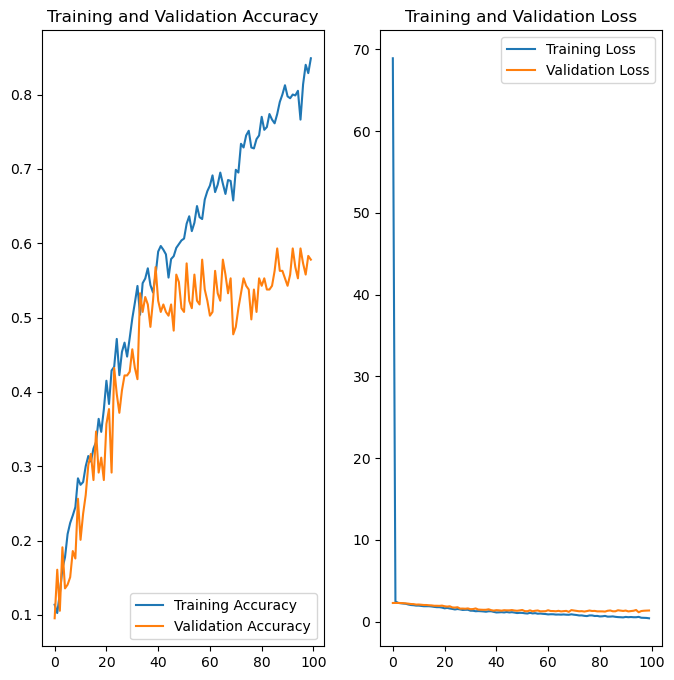

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# CNN model 3
num_classes = len(class_names)

model = keras.Sequential([
  layers.Input(shape=(img_height, img_width, 3)),
    
  layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
    
  layers.MaxPooling2D(pool_size=(2, 2)),
    
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
    
  layers.MaxPooling2D(pool_size=(2, 2)),
    
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'),
  layers.BatchNormalization(),
    
  layers.MaxPooling2D(pool_size=(2, 2)),
  
  layers.BatchNormalization(),
    
  layers.Flatten(),
  layers.BatchNormalization(),
  
  layers.Dropout(0.5),
    
  layers.Dense(num_classes, activation='softmax')
    
])

model.summary()

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 150, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 100, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 75, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 50, 75, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 38, 32)        9248      
                                                      

C:\Users\Nacho\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 [==============================] - 13s 419ms/step - loss: 2.8540 - accuracy: 0.2062 - val_loss: 4.3247 - val_accuracy: 0.1407
Epoch 2/100
25/25 [==============================] - 11s 437ms/step - loss: 1.9993 - accuracy: 0.3650 - val_loss: 2.8339 - val_accuracy: 0.2010
Epoch 3/100
25/25 [==============================] - 11s 428ms/step - loss: 1.6453 - accuracy: 0.4700 - val_loss: 3.2540 - val_accuracy: 0.2161
Epoch 4/100
25/25 [==============================] - 11s 428ms/step - loss: 1.3866 - accuracy: 0.5300 - val_loss: 3.0635 - val_accuracy: 0.2312
Epoch 5/100
25/25 [==============================] - 11s 436ms/step - loss: 1.2036 - accuracy: 0.5987 - val_loss: 3.3604 - val_accuracy: 0.1910
Epoch 6/100
25/25 [==============================] - 11s 432ms/step - loss: 1.0664 - accuracy: 0.6075 - val_loss: 2.3750 - val_accuracy: 0.2965
Epoch 7/100
25/25 [==============================] - 11s 428ms/step - loss: 0.8599 - accuracy: 0.7063 - val_loss: 2.1836 - val_accuracy: 0.3266
Epoc

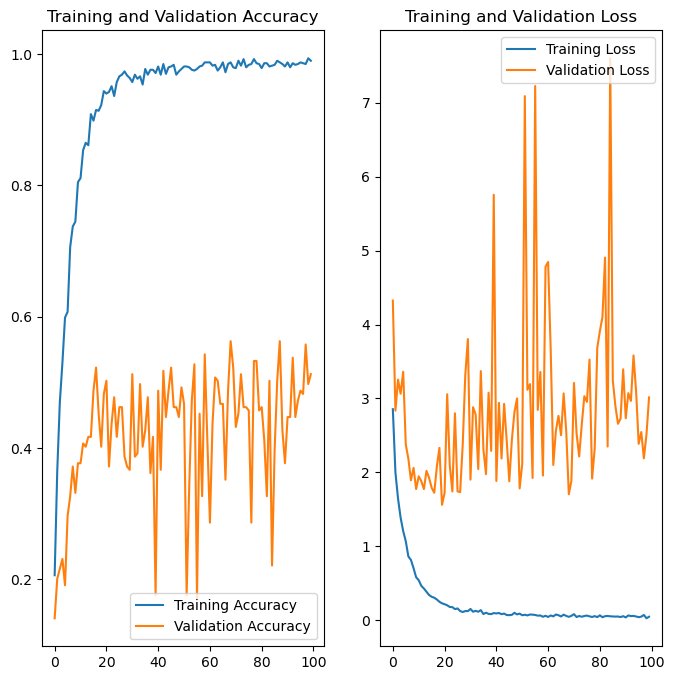

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()